# Import

In [1]:
# Import cell 
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
def save_excel(file, path, file_name, file_type):
    with pd.ExcelWriter(f'{path}/{file_name}.{file_type}', engine = 'openpyxl') as writer:
        for sheet_name, df in file.items():
            df.to_excel(writer, sheet_name = sheet_name, index = False)

In [3]:
!pip install openpyxl

In [4]:
base_path = "/Users/Mahdi/quera_ai/projects/project1/Project1_data"

In [5]:
u1400 = pd.read_excel(base_path + "/U1400.xlsx", sheet_name=None, engine = 'openpyxl')

In [6]:
U1400 = u1400.copy()

In [7]:
file_list = [u1400]
file_names = ['U1400']

# U1400Data

In [8]:
print(u1400['U1400Data'].columns)
u1400['U1400Data'] = u1400['U1400Data'][['Address', 'Fasl', 'weight', 'khanevartype', 'province','town']]

Index(['Address', 'Fasl', 'weight', 'khanevartype', 'Takmil', 'TakmilDescA',
       'TakmilDescB', 'TakmilDescC', 'Jaygozin', 'JaygozinDescA',
       'JaygozinDescB', 'JaygozinDescC', 'BlkAbdJaygozin', 'RadifJaygozin',
       'IsTel', 'FVam', 'province', 'town'],
      dtype='object')


In [9]:
u1400['U1400Data'].isna().mean()*100

Address         0.0
Fasl            0.0
weight          0.0
khanevartype    0.0
province        0.0
town            0.0
dtype: float64

# U1400P1

In [10]:
u1400['U1400P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           7.441388
studying          17.462315
degree            17.463832
occupationalst    13.969852
maritalst         13.966819
dtype: float64

In [11]:
u1400['U1400P1']['age'] = u1400['U1400P1']['age'].astype(int)

In [12]:
max_age_illiterate = max(u1400['U1400P1'][u1400['U1400P1']['literacy'].isna()]['age'])
print(max_age_illiterate)
if max_age_illiterate > 6:
    max_age_illiterate = 6
u1400['U1400P1'].loc[(u1400['U1400P1']['literacy'].isna()) & (u1400['U1400P1']['age'] <= max_age_illiterate), 'literacy'] = 'illiterate'
u1400['U1400P1'].loc[(u1400['U1400P1']['studying'].isna()) & (u1400['U1400P1']['age'] <= max_age_illiterate), 'studying'] = 'No'

6


In [13]:
u1400['U1400P1'].loc[(u1400['U1400P1']['studying'].isna()) & (u1400['U1400P1']['literacy'] == 'illiterate'), 'studying'] = 'No'

In [14]:
u1400['U1400P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           0.000000
studying           0.000000
degree            17.463832
occupationalst    13.969852
maritalst         13.966819
dtype: float64

In [15]:
u1400['U1400P1'].loc[(u1400['U1400P1']['studying'] == 'No') & (u1400['U1400P1']['degree'] == 'Other') & (u1400['U1400P1']['literacy'] == 'illiterate')]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst


In [16]:
u1400['U1400P1'].loc[(u1400['U1400P1']['literacy'] == 'illiterate'), 'degree'].value_counts()

Series([], Name: count, dtype: int64)

In [17]:
u1400['U1400P1'].loc[(u1400['U1400P1']['literacy'] == 'illiterate'), 'degree'] = 'No degree'

In [18]:
u1400['U1400P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           0.000000
studying           0.000000
degree             0.000000
occupationalst    13.969852
maritalst         13.966819
dtype: float64

In [19]:
u1400['U1400P1'].loc[u1400['U1400P1']['occupationalst'].isna(), 'occupationalst'] = 'Other'

In [20]:
u1400['U1400P1']['maritalst'].value_counts()

maritalst
Married     33727
Single      19072
Widowed      2976
Divorced      957
Name: count, dtype: int64

In [21]:
u1400['U1400P1'].loc[(u1400['U1400P1']['maritalst'].isna())]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
4,10011009720,3,Child,Male,7,literate,Yes,Elemantry,Other,NaN
5,10011009720,4,Child,Male,0,illiterate,No,No degree,Other,NaN
8,10011009735,3,Child,Male,4,illiterate,No,No degree,Other,NaN
36,10011009721,4,Child,Female,5,illiterate,No,No degree,Other,NaN
56,10006005935,5,Child,Male,9,literate,Yes,Elemantry,Other,NaN
...,...,...,...,...,...,...,...,...,...,...
65894,13002380625,7,Child,Male,1,illiterate,No,No degree,Other,NaN
65904,13001374527,4,Child,Male,7,literate,Yes,Elemantry,Other,NaN
65929,13003381827,4,GrandSonDaughter,Male,7,literate,Yes,Elemantry,Other,NaN
65934,13003381832,3,Child,Female,4,illiterate,No,No degree,Other,NaN


In [22]:
max_age_single = max(u1400['U1400P1'].loc[(u1400['U1400P1']['maritalst'].isna()), 'age'])
u1400['U1400P1'].loc[(u1400['U1400P1']['maritalst'].isna()) & (u1400['U1400P1']['relation'] == 'Child'), 'maritalst'] = 'Single'

In [23]:
u1400['U1400P1'].loc[(u1400['U1400P1']['maritalst'].isna()) & (u1400['U1400P1']['age'] <= max_age_single), 'maritalst'] = 'Single'

In [24]:
u1400['U1400P1'].isna().mean()*100

Address           0.0
member            0.0
relation          0.0
gender            0.0
age               0.0
literacy          0.0
studying          0.0
degree            0.0
occupationalst    0.0
maritalst         0.0
dtype: float64

# U1400P2

In [25]:
missing_value_u1400p2 = pd.DataFrame(u1400['U1400P2'].isna().mean()*100)
missing_value_u1400p2 = missing_value_u1400p2.reset_index()
missing_value_u1400p2.columns = ['feature', 'percentage']
missing_value_u1400p2[missing_value_u1400p2['percentage'] > 0]

,feature,percentage
1,tenure,8.821342
4,construction,8.821342
5,material,45.923964
42,cookingfuel,8.821342
43,heatingfuel,10.675776
44,waterheatingfuel,9.142034


In [26]:
cookingfuel_count = pd.DataFrame(u1400['U1400P2']['cookingfuel'].value_counts()).reset_index()
cookingfuel_count.columns = ['cookingfuel', 'count']
common_cookingfuel = cookingfuel_count.iloc[0, 0]

heatingfuel_count = pd.DataFrame(u1400['U1400P2']['heatingfuel'].value_counts()).reset_index()
heatingfuel_count.columns = ['heatingfuel', 'count']
common_heatingfuel = heatingfuel_count.iloc[0, 0]

waterheatingfuel_count = pd.DataFrame(u1400['U1400P2']['waterheatingfuel'].value_counts()).reset_index()
waterheatingfuel_count.columns = ['waterheatingfuel', 'count']
common_waterheatingfuel = waterheatingfuel_count.iloc[0, 0]

In [27]:
u1400['U1400P2'].loc[u1400['U1400P2']['cookingfuel'].isna(), 'cookingfuel'] = common_cookingfuel
u1400['U1400P2'].loc[u1400['U1400P2']['heatingfuel'].isna(), 'heatingfuel'] = common_heatingfuel
u1400['U1400P2'].loc[u1400['U1400P2']['waterheatingfuel'].isna(), 'waterheatingfuel'] = common_waterheatingfuel


In [28]:
missing_value_u1400p2 = pd.DataFrame(u1400['U1400P2'].isna().mean()*100)
missing_value_u1400p2 = missing_value_u1400p2.reset_index()
missing_value_u1400p2.columns = ['feature', 'percentage']
missing_value_u1400p2[missing_value_u1400p2['percentage'] > 0]

,feature,percentage
1,tenure,8.821342
4,construction,8.821342
5,material,45.923964


Question is : Is there any way to fill material ? Is it valuable ?

# U1400P3S01

In [29]:
u1400['U1400P3S01'].isna().mean()*100

Address       0.000000
code          0.000000
purchased     0.000000
gram         73.106829
kilogram     24.583824
price         8.997146
value         0.000162
dtype: float64

In [30]:
print(u1400['U1400P3S01'].columns)

u1400['U1400P3S01'].loc[(u1400['U1400P3S01']['kilogram'].isna()) & (~u1400['U1400P3S01']['price'].isna()), 'kilogram'] = u1400['U1400P3S01']['value'] / u1400['U1400P3S01']['price']


u1400['U1400P3S01'].loc[(~u1400['U1400P3S01']['kilogram'].isna()) & (u1400['U1400P3S01']['price'].isna()), 'price'] = u1400['U1400P3S01']['value'] / u1400['U1400P3S01']['kilogram']


u1400['U1400P3S01'] = u1400['U1400P3S01'].loc[~u1400['U1400P3S01']['kilogram'].isna() | ~u1400['U1400P3S01']['price'].isna()]


Index(['Address', 'code', 'purchased', 'gram', 'kilogram', 'price', 'value'], dtype='object')


In [31]:
print(u1400['U1400P3S01'].isna().mean()*100)

Address       0.000000
code          0.000000
purchased     0.000000
gram         70.450304
kilogram      0.000000
price         0.000000
value         0.000178
dtype: float64


In [32]:
u1400['U1400P3S01'] = u1400['U1400P3S01'][['Address', 'code', 'purchased', 'kilogram', 'value']]
print(u1400['U1400P3S01'].columns)


Index(['Address', 'code', 'purchased', 'kilogram', 'value'], dtype='object')


# U1400P3S02

In [33]:
u1400['U1400P3S02'].isna().mean()*100


Address        0.00000
code           0.00000
purchased      0.00000
gram         100.00000
kilogram      17.24353
price         17.24353
value          0.00000
dtype: float64

In [34]:
u1400['U1400P3S02']['value'] = pd.to_numeric(u1400['U1400P3S02']['value'], errors='coerce')
u1400['U1400P3S02']['kilogram'] = pd.to_numeric(u1400['U1400P3S02']['kilogram'], errors='coerce')

In [35]:
u1400['U1400P3S02'].loc[(u1400['U1400P3S02']['kilogram'].isna()) & (~u1400['U1400P3S02']['price'].isna()), 'kilogram'] = u1400['U1400P3S02']['value'] / u1400['U1400P3S02']['price']
u1400['U1400P3S02'].loc[(~u1400['U1400P3S02']['kilogram'].isna()) & (u1400['U1400P3S02']['price'].isna()), 'price'] = u1400['U1400P3S02']['value'] / u1400['U1400P3S02']['kilogram']
u1400['U1400P3S02'] = u1400['U1400P3S02'].loc[~u1400['U1400P3S02']['kilogram'].isna() | ~u1400['U1400P3S02']['price'].isna()]

In [36]:
u1400['U1400P3S02'].isna().mean()*100


Address        0.0
code           0.0
purchased      0.0
gram         100.0
kilogram       0.0
price          0.0
value          0.0
dtype: float64

In [37]:
u1400['U1400P3S02'] = u1400['U1400P3S02'][['Address', 'code', 'purchased', 'kilogram', 'value']]
print(u1400['U1400P3S02'].columns)

Index(['Address', 'code', 'purchased', 'kilogram', 'value'], dtype='object')


# U1400P3S04

In [38]:
u1400['U1400P3S04'].isna().mean()*100

Address       0.000000
code          0.000000
mortgage     96.203047
purchased    16.233283
value         0.000000
dtype: float64

Question is : Is there any way to fill purchased & mortgage ?

In [39]:
u1400['U1400P3S04']['purchased'].value_counts()

purchased
1    70190
8     1528
3      140
5      111
2       31
        19
7        7
4        3
6        2
Name: count, dtype: int64

In [40]:
u1400['U1400P3S04'].loc[(u1400['U1400P3S04']['purchased'].isna()) & (~u1400['U1400P3S04']['mortgage'].isna())]

,Address,code,mortgage,purchased,value


In [41]:
u1400['U1400P3S04'].loc[u1400['U1400P3S04']['purchased'].isna(), 'code'].value_counts()

code
42111    13948
42211       11
Name: count, dtype: int64

In [42]:
pd.set_option('display.max_rows', None)
grouped = u1400['U1400P3S04'].groupby('Address').filter(lambda x: ((x['code'] == 41111).any()) | ((x['code'] == 41112).any()))
print(grouped[((grouped.code == 41111) | (grouped.code == 41111) | (grouped.code == 42111) | (grouped.code == 42211))])
pd.reset_option('display.max_rows')

           Address   code  mortgage purchased      value
4      10003003235  41111       NaN         1    5000000
40     10003003219  41111       NaN         1   15000000
146    10005004635  41111       NaN         1     200000
161    10010008929  41111       NaN         1    3000000
172    10006005930  41111       NaN         1    8000000
244    10001001935  41111       NaN         1   10000000
249    10001001927  41111       NaN         1   11000000
276    10006005921  41111       NaN         1   12000000
294    10001001925  41111       NaN         1   10000000
321    10010008926  41111       NaN         1    5000000
357    10009008132  41111       NaN         1    7000000
389    10009008135  41111       NaN         1     200000
423    10006005530  41111       NaN         1    5000000
439    10005005135  41111       NaN         1    9500000
458    10005005132  41111       NaN         1   10000000
483    10006006330  41111       NaN         1    5000000
513    10006006335  41111      

# U1400P3S[03 + 05 - 12]

In [43]:
# All files are clean except U1400P3S10
# U1400P3S10 is empty

u1400['U1400P3S10']

,Address,code,purchased,value


# U1400P3S13

In [44]:
print(u1400['U1400P3S13'].isna().mean()*100)
print(f"len u1400['U1400P3S13'] = {len(u1400['U1400P3S13'])}")
print(f"len nan value in u1400['U1400P3S13'] = {len(u1400['U1400P3S13'][u1400['U1400P3S13']['value'].isna()])}")
u1400['U1400P3S13'][u1400['U1400P3S13']['value'].isna()]

Address    0.000000
code       0.000000
value      0.263589
dtype: float64
len u1400['U1400P3S13'] = 220419
len nan value in u1400['U1400P3S13'] = 581


,Address,code,value
11,10001000232,54023,NaN
185,10003003232,53112,NaN
409,10007007229,123111,NaN
997,10006005526,71116,NaN
1119,10006006332,123111,NaN
...,...,...,...
218310,12904362032,123111,NaN
218546,12907364835,71116,NaN
218554,12907364835,123111,NaN
219649,13001373122,123111,NaN


Fill Null values with median

In [45]:
u1400['U1400P3S13'].loc[u1400['U1400P3S13']['value'] == '          ', 'value'] = None
u1400['U1400P3S13']['value'] = u1400['U1400P3S13']['value'].astype('float64')
p3s13_median = u1400['U1400P3S13'][~u1400['U1400P3S13']['value'].isna()]['value'].median()
u1400['U1400P3S13']['value'] = u1400['U1400P3S13']['value'].fillna(p3s13_median)

Question is : Is there any way to fill value ?

# U1400P3S14

In [46]:
u1400['U1400P3S14'].isna().mean()*100

Address      0.000000
code         0.000000
purchased    4.468169
value        4.784500
dtype: float64

Question is : Is there any way to fill purchased & value ?

# U1400P4S01

In [47]:
u1400['U1400P4S01'].isna().mean()*100

Address            0.000000
member             0.000000
employed_w         0.000000
ISCO_w             0.000000
ISIC_w             0.000000
status_w           0.000000
hours_w            4.774579
days_w             4.758448
income_w_m         0.000000
income_w_y         0.000000
wage_w_m           0.024195
wage_w_y           0.008065
perk_w_m           0.008065
perk_w_y           0.008065
netincome_w_m      0.000000
netincome_w_y      0.000000
Fasl               0.000000
year               0.000000
DYCOL00          100.000000
dtype: float64

In [48]:
U1400_P4S01_mahdi = u1400['U1400P4S01'][['Address', 'member', 'employed_w', 'ISCO_w', 'ISIC_w', 'status_w' , 'hours_w', 'days_w','income_w_y', 'wage_w_y', 'perk_w_y', 'netincome_w_y', 'Fasl', 'year']]
U1400_P4S01_mahdi.isna().mean()*100

Address          0.000000
member           0.000000
employed_w       0.000000
ISCO_w           0.000000
ISIC_w           0.000000
status_w         0.000000
hours_w          4.774579
days_w           4.758448
income_w_y       0.000000
wage_w_y         0.008065
perk_w_y         0.008065
netincome_w_y    0.000000
Fasl             0.000000
year             0.000000
dtype: float64

In [49]:
print(U1400_P4S01_mahdi[U1400_P4S01_mahdi['wage_w_y'].isna()].index)
print(U1400_P4S01_mahdi[U1400_P4S01_mahdi['perk_w_y'].isna()].index)
U1400_P4S01_mahdi[(U1400_P4S01_mahdi['perk_w_y'].isna()) | (U1400_P4S01_mahdi['wage_w_y'].isna())]

Index([10018], dtype='int64')
Index([10018], dtype='int64')


,Address,member,employed_w,ISCO_w,ISIC_w,status_w,hours_w,days_w,income_w_y,wage_w_y,perk_w_y,netincome_w_y,Fasl,year
10018,10707085930,1,1,7115,25110,3,8.0,6.0,600000000,NaN,NaN,600000000,4,1401


In [50]:
U1400_P4S01_mahdi = U1400_P4S01_mahdi[~U1400_P4S01_mahdi['hours_w'].isna()]
U1400_P4S01_mahdi = U1400_P4S01_mahdi[~U1400_P4S01_mahdi['days_w'].isna()]

In [51]:
X = U1400_P4S01_mahdi[(~U1400_P4S01_mahdi['perk_w_y'].isna()) & (~U1400_P4S01_mahdi['wage_w_y'].isna())].drop(['Address', 'member', 'wage_w_y', 'perk_w_y'], axis = 1)
y1 = U1400_P4S01_mahdi[(~U1400_P4S01_mahdi['perk_w_y'].isna()) & (~U1400_P4S01_mahdi['wage_w_y'].isna())]['wage_w_y']
y2 = U1400_P4S01_mahdi[(~U1400_P4S01_mahdi['perk_w_y'].isna()) & (~U1400_P4S01_mahdi['wage_w_y'].isna())]['perk_w_y']

X_train, X_validation, y1_train, y1_validation = train_test_split(X, y1, test_size=0.25, random_state=42)
X_train, X_validation, y2_train, y2_validation = train_test_split(X, y2, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y1_train)
y1_pred_validation = model.predict(X_validation)
mean_squared_error_1 = mean_squared_error(y1_validation, y1_pred_validation)
r2_score_1 = r2_score(y1_validation, y1_pred_validation)
print("--- wage_w_y ---")
print(f"mean_squared_error = {mean_squared_error_1}")
print(f"r2_score = {r2_score_1}")

model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y2_train)
y2_pred_validation = model.predict(X_validation)
mean_squared_error_2 = mean_squared_error(y2_validation, y2_pred_validation)
r2_score_2 = r2_score(y2_validation, y2_pred_validation)
print("--- perk_w_y ---")
print("--- RandomForestRegressor ---")
print(f"mean_squared_error = {mean_squared_error_2}")
print(f"r2_score = {r2_score_2}")

model = GradientBoostingRegressor()
model.fit(X_train, y2_train)
y2_pred_validation = model.predict(X_validation)
mean_squared_error_2 = mean_squared_error(y2_validation, y2_pred_validation)
r2_score_2 = r2_score(y2_validation, y2_pred_validation)
print("--- perk_w_y ---")
print("--- GradientBoostingRegressor ---")
print(f"mean_squared_error = {mean_squared_error_2}")
print(f"r2_score = {r2_score_2}")

--- wage_w_y ---
mean_squared_error = 1390085820283507.5
r2_score = 0.9840429947342753
--- perk_w_y ---
--- RandomForestRegressor ---
mean_squared_error = 1430543388609779.2
r2_score = 0.2896343284741386
--- perk_w_y ---
--- GradientBoostingRegressor ---
mean_squared_error = 1511708538129687.5
r2_score = 0.2493301081322178


In [52]:
U1400_P4S01_mahdi = U1400_P4S01_mahdi.loc[(~U1400_P4S01_mahdi['perk_w_y'].isna()) | (~U1400_P4S01_mahdi['wage_w_y'].isna())]

# U1400P4S02

In [53]:
u1400['U1400P4S02'].isna().mean()*100

Address              0.000000
member               0.000000
employed_s           0.000000
ISCO_s               0.015684
ISIC_s               0.015684
status_s             0.000000
agriculture          0.000000
hours_s              1.505646
days_s               1.505646
cost_employment     15.040778
cost_raw             4.548306
cost_machinery       9.190715
cost_others          6.618570
cost_tax            15.824969
sale                 1.270389
income_s_y           0.000000
Fasl                 0.000000
year                 0.000000
DYCOL00            100.000000
dtype: float64

In [ ]:
u1400['U1400P4S02']

In [54]:
u1400['U1400P4S02'].columns

Index(['Address', 'member', 'employed_s', 'ISCO_s', 'ISIC_s', 'status_s',
       'agriculture', 'hours_s', 'days_s', 'cost_employment', 'cost_raw',
       'cost_machinery', 'cost_others', 'cost_tax', 'sale', 'income_s_y',
       'Fasl', 'year', 'DYCOL00'],
      dtype='object')

In [55]:
U1400_P4S02_mahdi = u1400['U1400P4S02'][['Address', 'member', 'employed_s', 'ISCO_s', 'ISIC_s', 'status_s', 'agriculture', 'sale', 'income_s_y', 'Fasl', 'year']]
U1400_P4S02_mahdi = U1400_P4S02_mahdi[(~U1400_P4S02_mahdi['employed_s'].isna()) & (~U1400_P4S02_mahdi['ISCO_s'].isna()) & (~U1400_P4S02_mahdi['ISIC_s'].isna()) & (~U1400_P4S02_mahdi['status_s'].isna()) & (~U1400_P4S02_mahdi['agriculture'].isna())]

In [56]:
U1400_P4S02_mahdi.isna().mean()*100

Address        0.000000
member         0.000000
employed_s     0.000000
ISCO_s         0.000000
ISIC_s         0.000000
status_s       0.000000
agriculture    0.000000
sale           1.270588
income_s_y     0.000000
Fasl           0.000000
year           0.000000
dtype: float64

In [57]:
print(len(U1400_P4S02_mahdi[U1400_P4S02_mahdi['sale'].isna()]))
print(len(U1400_P4S02_mahdi[U1400_P4S02_mahdi['sale'] == 0]))
print(len(U1400_P4S02_mahdi[U1400_P4S02_mahdi['income_s_y'].isna()]))
print(len(U1400_P4S02_mahdi[U1400_P4S02_mahdi['income_s_y'] == 0]))


81
369
0
386


In [58]:
U1400_P4S02_mahdi[(U1400_P4S02_mahdi['sale'] == 0) | (U1400_P4S02_mahdi['sale'].isna())]['employed_s'].value_counts()

employed_s
1    438
2     12
Name: count, dtype: int64

In [59]:
U1400_P4S02_mahdi[(U1400_P4S02_mahdi['income_s_y'] == 0) | (U1400_P4S02_mahdi['income_s_y'].isna())]['employed_s'].value_counts()

employed_s
1    375
2     11
Name: count, dtype: int64

In [60]:
U1400_P4S02_mahdi.loc[((U1400_P4S02_mahdi['income_s_y'] == 0) | (U1400_P4S02_mahdi['income_s_y'].isna())) & (U1400_P4S02_mahdi['employed_s'] == 2), 'income_s_y'] = 0
U1400_P4S02_mahdi.loc[((U1400_P4S02_mahdi['sale'] == 0) | (U1400_P4S02_mahdi['sale'].isna())) & (U1400_P4S02_mahdi['employed_s'] == 2), 'sale'] = 0

In [61]:
X = U1400_P4S02_mahdi[~U1400_P4S02_mahdi['sale'].isna()].drop(['Address', 'member', 'sale'], axis = 1)
y1 = U1400_P4S02_mahdi[~U1400_P4S02_mahdi['sale'].isna()]['sale']
X_train, X_validation, y_train, y_validation = train_test_split(X, y1, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

r2_score = -0.09608482053463119
r2_score = -0.032561748434185134
r2_score = 0.057160841313184885
r2_score = 0.10980942847543662


In [62]:
U1400_P4S02_mahdi = U1400_P4S02_mahdi[~U1400_P4S02_mahdi['sale'].isna()]

# U1400P4S03

In [63]:
u1400['U1400P4S03'].isna().mean()*100

Address              0.000000
member               0.004108
income_pension      58.907373
income_rent         73.555145
income_interest     36.463339
income_aid          28.186486
income_resale       76.023824
income_transfer     64.481413
Fasl                 0.000000
year                 0.000000
DYCOL00            100.000000
dtype: float64

In [64]:
u1400_P4S03_mahdi = u1400['U1400P4S03'].drop(['DYCOL00'], axis = 1)

# U1400_P4S04

In [65]:
u1400['U1400P4S04'].isna().mean()*100

Address             0.000000
member              0.000000
subsidy_number      0.006239
subsidy_month       0.006239
subsidy             0.000000
Fasl                0.000000
year                0.000000
DYCOL00           100.000000
dtype: float64

In [66]:
u1400_P4S04_mahdi = u1400['U1400P4S04'].drop(['DYCOL00'], axis = 1)

# Mahdi's Files

In [67]:
U1400_P4S01_mahdi
U1400_P4S02_mahdi
u1400_P4S03_mahdi
u1400_P4S04_mahdi

,Address,member,subsidy_number,subsidy_month,subsidy,Fasl,year
0,10001000226,1,1.0,12.0,1960000,1,1401
1,10003003229,1,4.0,12.0,21840000,1,1401
2,10011009725,1,2.0,12.0,10920000,1,1401
3,10011009720,1,1.0,12.0,1610000,1,1401
4,10011009720,2,2.0,12.0,10920000,1,1401
...,...,...,...,...,...,...,...
32049,13006382735,1,1.0,12.0,1260000,4,1401
32050,13006382735,2,2.0,12.0,10920000,4,1401
32051,13001379822,1,1.0,12.0,1260000,4,1401
32052,13001379822,2,3.0,12.0,16380000,4,1401


# U1400_P4S01

In [68]:
U1400_P4S01_mahdi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11805 entries, 0 to 12398
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        11805 non-null  int64  
 1   member         11805 non-null  int64  
 2   employed_w     11805 non-null  int64  
 3   ISCO_w         11805 non-null  int64  
 4   ISIC_w         11805 non-null  int64  
 5   status_w       11805 non-null  int64  
 6   hours_w        11805 non-null  float64
 7   days_w         11805 non-null  float64
 8   income_w_y     11805 non-null  int64  
 9   wage_w_y       11805 non-null  float64
 10  perk_w_y       11805 non-null  float64
 11  netincome_w_y  11805 non-null  int64  
 12  Fasl           11805 non-null  int64  
 13  year           11805 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.4 MB


In [69]:
print(U1400_P4S01_mahdi.shape)
test_duplicate = U1400_P4S01_mahdi.drop_duplicates()
print(test_duplicate.shape)

(11805, 14)
(11805, 14)


In [70]:
U1400_P4S01_mahdi_employed_no_income = U1400_P4S01_mahdi[(U1400_P4S01_mahdi['employed_w'] == 1) & (U1400_P4S01_mahdi['netincome_w_y'] == 0)]
U1400_P4S01_mahdi_unemployed_with_income = U1400_P4S01_mahdi[(U1400_P4S01_mahdi['employed_w'] == 2) & (U1400_P4S01_mahdi['netincome_w_y'] != 0)]

print(len(U1400_P4S01_mahdi))
print(len(U1400_P4S01_mahdi_employed_no_income))
print(len(U1400_P4S01_mahdi_unemployed_with_income))

11805
19
204


وضعیت اشتغال و حقوق گرفتن یکسری ناهماهنگی داره

In [71]:
U1400_P4S01_mahdi_employed_no_income_condition = (U1400_P4S01_mahdi['employed_w'] == 1) & (U1400_P4S01_mahdi['netincome_w_y'] == 0)
U1400_P4S01_mahdi_unemployed_with_income_condition = (U1400_P4S01_mahdi['employed_w'] == 2) & (U1400_P4S01_mahdi['netincome_w_y'] != 0)

U1400_P4S01_mahdi_clean = U1400_P4S01_mahdi[~(U1400_P4S01_mahdi_employed_no_income_condition | U1400_P4S01_mahdi_unemployed_with_income_condition)]
U1400_P4S01_mahdi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11582 entries, 0 to 12398
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        11582 non-null  int64  
 1   member         11582 non-null  int64  
 2   employed_w     11582 non-null  int64  
 3   ISCO_w         11582 non-null  int64  
 4   ISIC_w         11582 non-null  int64  
 5   status_w       11582 non-null  int64  
 6   hours_w        11582 non-null  float64
 7   days_w         11582 non-null  float64
 8   income_w_y     11582 non-null  int64  
 9   wage_w_y       11582 non-null  float64
 10  perk_w_y       11582 non-null  float64
 11  netincome_w_y  11582 non-null  int64  
 12  Fasl           11582 non-null  int64  
 13  year           11582 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.3 MB


In [72]:
U1400_P4S01_family_netincome = U1400_P4S01_mahdi_clean[['Address', 'netincome_w_y']]
U1400_P4S01_family_netincome = U1400_P4S01_family_netincome.groupby('Address')['netincome_w_y'].sum().reset_index()
U1400_P4S01_family_netincome['Address'].is_unique
len(U1400_P4S01_family_netincome)

9732

# U1400_P4S02

In [73]:
U1400_P4S02_mahdi

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
0,10003003229,1,1,6111.0,1110.0,5,1,7.500000e+07,30000000,1,1401
1,10003003229,1,1,6121.0,1440.0,5,1,8.600000e+07,43500000,1,1401
2,10011009720,1,1,6121.0,1440.0,5,1,3.500000e+08,208000000,1,1401
3,10011009735,1,1,9129.0,96010.0,4,2,1.580000e+09,480000000,1,1401
4,10003003235,4,1,6111.0,1110.0,5,1,2.500000e+08,162000000,1,1401
...,...,...,...,...,...,...,...,...,...,...,...
6371,13001379035,1,1,7121.0,43300.0,5,2,4.800000e+08,480000000,4,1401
6372,13002380622,1,1,5143.0,96020.0,5,2,2.400000e+08,240000000,4,1401
6373,13002380622,2,1,2414.0,66110.0,5,2,7.200000e+08,720000000,4,1401
6374,13002380625,1,1,9211.0,1610.0,5,1,7.800000e+08,780000000,4,1401


In [74]:
print(U1400_P4S02_mahdi.shape)
test_duplicate = U1400_P4S02_mahdi.drop_duplicates()
print(test_duplicate.shape)

(6294, 11)
(6294, 11)


In [75]:
U1400_P4S02_mahdi_employed_no_income = U1400_P4S02_mahdi[(U1400_P4S02_mahdi['employed_s'] == 1) & (U1400_P4S02_mahdi['income_s_y'] == 0)]
U1400_P4S02_mahdi_unemployed_with_income = U1400_P4S02_mahdi[(U1400_P4S02_mahdi['employed_s'] == 2) & (U1400_P4S02_mahdi['income_s_y'] != 0)]

print(len(U1400_P4S02_mahdi))
print(len(U1400_P4S02_mahdi_employed_no_income))
print(len(U1400_P4S02_mahdi_unemployed_with_income))

6294
333
132


In [76]:
U1400_P4S02_mahdi_employed_no_income[U1400_P4S02_mahdi_employed_no_income['agriculture']!=2]

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
184,10320046320,4,1,6112.0,1210.0,6,1,0.0,0,1,1401
185,10320046320,5,1,6112.0,1210.0,6,1,0.0,0,1,1401
254,10408054532,2,1,6121.0,1411.0,6,1,0.0,0,1,1401
255,10408054532,3,1,6121.0,1411.0,6,1,0.0,0,1,1401
256,10408054532,4,1,6121.0,1411.0,6,1,0.0,0,1,1401
...,...,...,...,...,...,...,...,...,...,...,...
6272,12804351532,2,1,6121.0,1440.0,6,1,0.0,0,4,1401
6314,12905362435,2,1,6121.0,1440.0,6,1,0.0,0,4,1401
6330,12902360026,2,1,6121.0,1440.0,6,1,0.0,0,4,1401
6332,12902360023,2,1,6121.0,1440.0,6,1,0.0,0,4,1401


In [77]:
test_employment_income = u1400['U1400P4S02']

In [78]:
U1400_P4S02_mahdi_employed_no_income_test = test_employment_income[(test_employment_income['employed_s'] == 1) & (test_employment_income['income_s_y'] == 0)]
U1400_P4S02_selected_columns = U1400_P4S02_mahdi_employed_no_income_test[['cost_employment', 'cost_raw', 'cost_machinery', 'cost_others', 'sale','income_s_y']]
# U1400_P4S02_mahdi_employed_no_income_test.info()
num_zero_or_nan_cost_raw = ((U1400_P4S02_selected_columns['cost_others'] == 0) | U1400_P4S02_selected_columns['cost_others'].isna()).sum()
print(len(U1400_P4S02_mahdi_employed_no_income_test))
print(num_zero_or_nan_cost_raw)



375
373


In [79]:
not_zero_not_nan_cost_raw = U1400_P4S02_selected_columns[(U1400_P4S02_selected_columns['cost_others'] != 0) & U1400_P4S02_selected_columns['cost_others'].notna()]
print(not_zero_not_nan_cost_raw)
print(len(not_zero_not_nan_cost_raw))

      cost_employment     cost_raw  cost_machinery  cost_others         sale  \
5235              0.0  110000000.0             0.0  100000000.0  210000000.0   
5277              0.0   40000000.0             0.0   60000000.0  100000000.0   

      income_s_y  
5235           0  
5277           0  
2


In [80]:
U1400_P4S02_mahdi_employed_no_income_condition = (U1400_P4S02_mahdi['employed_s'] == 1) & (U1400_P4S02_mahdi['income_s_y'] == 0)
U1400_P4S02_mahdi_unemployed_with_income_condition = (U1400_P4S02_mahdi['employed_s'] == 2) & (U1400_P4S02_mahdi['income_s_y'] != 0)

U1400_P4S02_mahdi_clean = U1400_P4S02_mahdi[~(U1400_P4S02_mahdi_employed_no_income_condition | U1400_P4S02_mahdi_unemployed_with_income_condition)]
U1400_P4S02_mahdi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5829 entries, 0 to 6375
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      5829 non-null   int64  
 1   member       5829 non-null   int64  
 2   employed_s   5829 non-null   int64  
 3   ISCO_s       5829 non-null   float64
 4   ISIC_s       5829 non-null   float64
 5   status_s     5829 non-null   int64  
 6   agriculture  5829 non-null   int64  
 7   sale         5829 non-null   float64
 8   income_s_y   5829 non-null   int64  
 9   Fasl         5829 non-null   int64  
 10  year         5829 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 546.5 KB


In [81]:
U1400_P4S02_family_netincome = U1400_P4S02_mahdi_clean[['Address', 'income_s_y']]
U1400_P4S02_family_netincome = U1400_P4S02_family_netincome.groupby('Address')['income_s_y'].sum().reset_index()
U1400_P4S02_family_netincome['Address'].is_unique
len(U1400_P4S02_family_netincome)

5253

# U1400_P4S03

In [82]:
u1400_P4S03_mahdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24345 entries, 0 to 24344
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          24345 non-null  int64  
 1   member           24344 non-null  float64
 2   income_pension   10004 non-null  object 
 3   income_rent      6438 non-null   float64
 4   income_interest  15468 non-null  float64
 5   income_aid       17483 non-null  float64
 6   income_resale    5837 non-null   float64
 7   income_transfer  8647 non-null   float64
 8   Fasl             24345 non-null  int64  
 9   year             24345 non-null  int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 1.9+ MB


In [83]:
print(u1400_P4S03_mahdi.shape)
test_duplicate = u1400_P4S03_mahdi.drop_duplicates()
print(test_duplicate.shape)

(24345, 10)
(24345, 10)


In [84]:
u1400_P4S03_mahdi.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,10001000226,1.0,0420000000,NaN,NaN,15400000.0,NaN,NaN,1,1401
1,10003003229,1.0,NaN,NaN,2000000.0,20640000.0,NaN,NaN,1,1401
2,10003003229,3.0,0042000000,NaN,NaN,NaN,NaN,NaN,1,1401
3,10011009725,1.0,NaN,NaN,12360000.0,8000000.0,NaN,NaN,1,1401
4,10011009720,1.0,NaN,NaN,16560000.0,10000000.0,NaN,NaN,1,1401


In [85]:
U1400_P4S03_family_netincome = u1400_P4S03_mahdi.copy()
U1400_P4S03_family_netincome['income_pension'] = pd.to_numeric(U1400_P4S03_family_netincome['income_pension'], errors='coerce')
U1400_P4S03_family_netincome['income_rent'] = pd.to_numeric(U1400_P4S03_family_netincome['income_rent'], errors='coerce')
U1400_P4S03_family_netincome['income_transfer'] = pd.to_numeric(U1400_P4S03_family_netincome['income_transfer'], errors='coerce')
U1400_P4S03_family_netincome['income_resale'] = pd.to_numeric(U1400_P4S03_family_netincome['income_resale'], errors='coerce')
U1400_P4S03_family_netincome['income_interest'] = pd.to_numeric(U1400_P4S03_family_netincome['income_interest'], errors='coerce')


In [86]:
U1400_P4S03_family_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24345 entries, 0 to 24344
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          24345 non-null  int64  
 1   member           24344 non-null  float64
 2   income_pension   10003 non-null  float64
 3   income_rent      6438 non-null   float64
 4   income_interest  15468 non-null  float64
 5   income_aid       17483 non-null  float64
 6   income_resale    5837 non-null   float64
 7   income_transfer  8647 non-null   float64
 8   Fasl             24345 non-null  int64  
 9   year             24345 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 1.9 MB


In [87]:
U1400_P4S03_family_netincome.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,10001000226,1.0,420000000.0,NaN,NaN,15400000.0,NaN,NaN,1,1401
1,10003003229,1.0,NaN,NaN,2000000.0,20640000.0,NaN,NaN,1,1401
2,10003003229,3.0,42000000.0,NaN,NaN,NaN,NaN,NaN,1,1401
3,10011009725,1.0,NaN,NaN,12360000.0,8000000.0,NaN,NaN,1,1401
4,10011009720,1.0,NaN,NaN,16560000.0,10000000.0,NaN,NaN,1,1401


In [88]:
U1400_P4S03_family_netincome['total_income'] = (
    U1400_P4S03_family_netincome['income_pension'].fillna(0) +
    U1400_P4S03_family_netincome['income_rent'].fillna(0) +
    U1400_P4S03_family_netincome['income_interest'].fillna(0) +
    U1400_P4S03_family_netincome['income_aid'].fillna(0) +
    U1400_P4S03_family_netincome['income_resale'].fillna(0) +
    U1400_P4S03_family_netincome['income_transfer'].fillna(0)
)
U1400_P4S03_family_netincome.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year,total_income
0,10001000226,1.0,420000000.0,NaN,NaN,15400000.0,NaN,NaN,1,1401,435400000.0
1,10003003229,1.0,NaN,NaN,2000000.0,20640000.0,NaN,NaN,1,1401,22640000.0
2,10003003229,3.0,42000000.0,NaN,NaN,NaN,NaN,NaN,1,1401,42000000.0
3,10011009725,1.0,NaN,NaN,12360000.0,8000000.0,NaN,NaN,1,1401,20360000.0
4,10011009720,1.0,NaN,NaN,16560000.0,10000000.0,NaN,NaN,1,1401,26560000.0


In [89]:
U1400_P4S03_family_netincome.shape

(24345, 11)

In [90]:
U1400_P4S03_family_netincome = U1400_P4S03_family_netincome[['Address', 'total_income']]
U1400_P4S03_family_netincome = U1400_P4S03_family_netincome.groupby('Address')['total_income'].sum().reset_index()
U1400_P4S03_family_netincome.shape

(17671, 2)

In [91]:
U1400_P4S03_family_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17671 entries, 0 to 17670
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       17671 non-null  int64  
 1   total_income  17671 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 276.2 KB


# U1400_P4S04

In [92]:
U1400_P4S04_family_netincome = u1400_P4S04_mahdi.copy()
U1400_P4S04_family_netincome.info()
print(U1400_P4S04_family_netincome.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32054 entries, 0 to 32053
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         32054 non-null  int64  
 1   member          32054 non-null  int64  
 2   subsidy_number  32052 non-null  float64
 3   subsidy_month   32052 non-null  float64
 4   subsidy         32054 non-null  int64  
 5   Fasl            32054 non-null  int64  
 6   year            32054 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.7 MB
(32054, 7)


In [93]:
U1400_P4S04_family_netincome = U1400_P4S04_family_netincome[['Address', 'subsidy']]
U1400_P4S04_family_netincome = U1400_P4S04_family_netincome.groupby('Address')['subsidy'].sum().reset_index()
U1400_P4S04_family_netincome.shape

(17944, 2)

# net income sources

In [94]:
U1400_P4S01_family_netincome_column = U1400_P4S01_family_netincome.rename(columns={'netincome_w_y': 'netincome'})
U1400_P4S02_family_netincome_column = U1400_P4S02_family_netincome.rename(columns={'income_s_y': 'netincome'})
U1400_P4S03_family_netincome_column = U1400_P4S03_family_netincome.rename(columns={'total_income': 'netincome'})
U1400_P4S04_family_netincome_column = U1400_P4S04_family_netincome.rename(columns={'subsidy': 'netincome'})
print(U1400_P4S03_family_netincome_column.columns)
# isna??

Index(['Address', 'netincome'], dtype='object')


In [95]:
merged_df_netincome = U1400_P4S01_family_netincome_column.merge(U1400_P4S02_family_netincome_column, on='Address', how='outer', suffixes=('_P4S01', '_P4S02'))

U1400_P4S03_family_netincome_column = U1400_P4S03_family_netincome_column.rename(columns={'netincome': 'netincome_P4S03'})
merged_df_netincome = merged_df_netincome.merge(U1400_P4S03_family_netincome_column, on='Address', how='outer')

U1400_P4S04_family_netincome_column = U1400_P4S04_family_netincome_column.rename(columns={'netincome': 'netincome_P4S04'})
merged_df_netincome = merged_df_netincome.merge(U1400_P4S04_family_netincome_column, on='Address', how='outer')


merged_df_netincome = merged_df_netincome.fillna(0)
merged_df_netincome.head()

merged_df_netincome['total_netincome'] = (
    merged_df_netincome['netincome_P4S01'] +
    merged_df_netincome['netincome_P4S02'] +
    merged_df_netincome['netincome_P4S03'] +
    merged_df_netincome['netincome_P4S04']
)

In [96]:
total_net_income = merged_df_netincome
total_net_income.shape

(19607, 6)

In [97]:
total_net_income.describe()

,Address,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
count,1.960700e+04,1.960700e+04,1.960700e+04,1.960700e+04,1.960700e+04,1.960700e+04
mean,1.154432e+10,2.899793e+08,1.538845e+08,2.374720e+08,1.374124e+07,6.950770e+08
std,8.958553e+08,4.069613e+08,4.685043e+08,3.748071e+08,8.172794e+06,6.121622e+08
min,1.000100e+10,0.000000e+00,-9.688400e+08,0.000000e+00,0.000000e+00,-3.235800e+08
25%,1.080310e+10,0.000000e+00,0.000000e+00,2.032000e+07,6.720000e+06,3.722790e+08
50%,1.160119e+10,0.000000e+00,0.000000e+00,4.195000e+07,1.253000e+07,5.790800e+08
75%,1.230128e+10,5.000000e+08,9.510000e+07,3.940000e+08,1.764000e+07,8.750050e+08
max,1.300638e+10,5.400000e+09,2.233000e+10,7.449000e+09,6.552000e+07,2.450000e+10


In [98]:
total_net_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19607 entries, 0 to 19606
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          19607 non-null  int64  
 1   netincome_P4S01  19607 non-null  float64
 2   netincome_P4S02  19607 non-null  float64
 3   netincome_P4S03  19607 non-null  float64
 4   netincome_P4S04  19607 non-null  float64
 5   total_netincome  19607 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 919.2 KB


In [99]:
total_net_income.head()

,Address,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
0,10001000120,1.148000e+09,0.0,225500000.0,17640000.0,1.391140e+09
1,10001000132,1.200000e+08,0.0,943500000.0,12180000.0,1.075680e+09
2,10001000220,7.400000e+08,0.0,25600000.0,12880000.0,7.784800e+08
3,10001000221,5.240000e+08,0.0,25600000.0,12880000.0,5.624800e+08
4,10001000232,6.800000e+08,0.0,890800000.0,7420000.0,1.578220e+09


In [100]:
# agriculture in urban?

In [101]:
u1400_data = u1400['U1400Data']

In [102]:
u1400_data.describe()

,Address,Fasl,weight,khanevartype,town
count,1.961800e+04,19618.000000,19618.000000,19618.000000,19618.000000
mean,1.154417e+10,2.506932,1047.914568,1.000816,6.004995
std,8.958505e+08,1.113289,1061.194441,0.028547,5.329905
min,1.000100e+10,1.000000,74.000000,1.000000,1.000000
25%,1.080310e+10,2.000000,285.000000,1.000000,2.000000
50%,1.160119e+10,3.000000,615.000000,1.000000,4.000000
75%,1.230128e+10,3.000000,1499.000000,1.000000,8.000000
max,1.300638e+10,4.000000,15253.000000,2.000000,38.000000


In [103]:
u1400_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Address       19618 non-null  int64 
 1   Fasl          19618 non-null  int64 
 2   weight        19618 non-null  int64 
 3   khanevartype  19618 non-null  int64 
 4   province      19618 non-null  object
 5   town          19618 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 919.7+ KB


In [104]:
u1400_data.head()

,Address,Fasl,weight,khanevartype,province,town
0,10001000119,4,1245,1,Markazi,1
1,10001000120,4,1245,1,Markazi,1
2,10001000126,4,1245,1,Markazi,1
3,10001000130,4,1245,1,Markazi,1
4,10001000132,4,1245,1,Markazi,1


In [105]:
total_income_province = u1400_data.merge(total_net_income, on='Address', how='left')

In [106]:
family_incomes_dataset= total_income_province.rename(columns={'netincome_P4S01': 'Hoghugh_Income', 
                                      'netincome_P4S02': 'Azad_Income', 'netincome_P4S03':'Other_Income', 'netincome_P4S04': 'Yarane_Income'})

In [107]:
family_incomes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          19618 non-null  int64  
 1   Fasl             19618 non-null  int64  
 2   weight           19618 non-null  int64  
 3   khanevartype     19618 non-null  int64  
 4   province         19618 non-null  object 
 5   town             19618 non-null  int64  
 6   Hoghugh_Income   19607 non-null  float64
 7   Azad_Income      19607 non-null  float64
 8   Other_Income     19607 non-null  float64
 9   Yarane_Income    19607 non-null  float64
 10  total_netincome  19607 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.6+ MB


In [108]:
family_incomes_dataset.to_csv('family_incomes_dataset.csv', index=False)

In [109]:
total_income_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          19618 non-null  int64  
 1   Fasl             19618 non-null  int64  
 2   weight           19618 non-null  int64  
 3   khanevartype     19618 non-null  int64  
 4   province         19618 non-null  object 
 5   town             19618 non-null  int64  
 6   netincome_P4S01  19607 non-null  float64
 7   netincome_P4S02  19607 non-null  float64
 8   netincome_P4S03  19607 non-null  float64
 9   netincome_P4S04  19607 non-null  float64
 10  total_netincome  19607 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.6+ MB


In [110]:
total_income_province.head()
unique_provinces = total_income_province['province'].unique()
print(unique_provinces)

['Markazi' 'Gilan' 'Mazandaran' 'AzarbaijanSharghi' 'AzarbaijanGharbi'
 'Kermanshah' 'Kouzestan' 'Fars' 'Kerman' 'KhorasanRazavi' 'Esfahan'
 'SistanBalouchestan' 'Kordestan' 'Hamedan' 'CharmahalBakhtiari'
 'Lorestan' 'Ilam' 'KohkilouyeBoyerahamad' 'Boushehr' 'Zanjan' 'Semnan'
 'Yazd' 'Hormozgan' 'Tehran' 'Ardebil' 'Qom' 'Qazvin' 'Golestan'
 'KhorasanShomali' 'KhorasanJonoubi' 'Alborz']


In [111]:
rural_chaharmahal_data = total_income_province[total_income_province['province']=='CharmahalBakhtiari']
rural_chaharmahal_data.head()
print(len(rural_chaharmahal_data))
nan_netincome_rows = rural_chaharmahal_data[rural_chaharmahal_data['total_netincome'].isna()]
print(nan_netincome_rows)

651
Empty DataFrame
Columns: [Address, Fasl, weight, khanevartype, province, town, netincome_P4S01, netincome_P4S02, netincome_P4S03, netincome_P4S04, total_netincome]
Index: []


# U1400-CharmahalBakhtiari

In [112]:
rural_chaharmahal_data

,Address,Fasl,weight,khanevartype,province,town,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
8657,11401171720,4,282,1,CharmahalBakhtiari,1,0.0,600000000.0,411000000.0,12180000.0,1.023180e+09
8658,11401171723,4,282,1,CharmahalBakhtiari,1,655000000.0,0.0,16560000.0,12180000.0,6.837400e+08
8659,11401171727,4,282,1,CharmahalBakhtiari,1,0.0,0.0,58900000.0,5460000.0,6.436000e+07
8660,11401171729,4,282,1,CharmahalBakhtiari,1,890900000.0,0.0,19560000.0,12180000.0,9.226400e+08
8661,11401171732,4,282,1,CharmahalBakhtiari,1,0.0,0.0,216600000.0,1260000.0,2.178600e+08
...,...,...,...,...,...,...,...,...,...,...,...
9303,11409183520,2,155,1,CharmahalBakhtiari,9,496000000.0,0.0,38440000.0,21840000.0,5.562800e+08
9304,11409183523,2,155,1,CharmahalBakhtiari,9,630000000.0,0.0,53250000.0,23100000.0,7.063500e+08
9305,11409183526,2,155,1,CharmahalBakhtiari,9,480000000.0,0.0,30010000.0,6720000.0,5.167300e+08
9306,11409183532,2,155,1,CharmahalBakhtiari,9,0.0,0.0,559360000.0,6720000.0,5.660800e+08


In [113]:
family_incomes_chaharmahal_dataset= rural_chaharmahal_data.rename(columns={'netincome_P4S01': 'Hoghugh_Income', 
                                      'netincome_P4S02': 'Azad_Income', 'netincome_P4S03':'Other_Income', 'netincome_P4S04': 'Yarane_Income'})

In [114]:
family_incomes_chaharmahal_dataset.to_csv('family_incomes_chaharmahal_dataset.csv', index=False)

# U1400 Members Income

In [115]:
U1400_P4S01_mahdi_clean

,Address,member,employed_w,ISCO_w,ISIC_w,status_w,hours_w,days_w,income_w_y,wage_w_y,perk_w_y,netincome_w_y,Fasl,year
0,10003003229,1,1,9112,86903,1,8.0,6.0,555000000,508800000.0,15000000.0,523800000,1,1401
1,10011009725,1,1,8322,49230,3,12.0,6.0,480000000,480000000.0,0.0,480000000,1,1401
2,10011009729,2,1,9211,1500,3,8.0,3.0,198000000,198000000.0,0.0,198000000,1,1401
3,10011009721,1,1,9211,1500,3,8.0,5.0,230000000,230000000.0,0.0,230000000,1,1401
4,10001001535,1,1,9314,41000,3,10.0,7.0,300000000,300000000.0,0.0,300000000,1,1401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12394,13006382726,2,1,9314,41000,3,9.0,6.0,480000000,480000000.0,0.0,480000000,4,1401
12395,13006382732,1,1,9314,41000,3,8.0,6.0,611000000,491919999.0,95000000.0,586919999,4,1401
12396,13006382735,1,1,9329,15200,3,8.0,6.0,746000000,606320004.0,110000000.0,716320004,4,1401
12397,13006383420,2,1,2341,84120,1,6.0,6.0,980000000,764800000.0,140000000.0,904800000,4,1401


In [116]:
# check duplicate records for same members

duplicates = U1400_P4S01_mahdi_clean[U1400_P4S01_mahdi_clean.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member  employed_w  ISCO_w  ISIC_w  status_w  hours_w  \
100    10107019235       1           1    9214    1270         3      8.0   
101    10107019235       1           1    9211    1120         3      7.0   
238    10227035423       1           1    5153   97000         3      8.0   
239    10227035423       1           1    9314   41000         3      8.0   
272    10321046829       1           1    9214    1240         3      8.0   
...            ...     ...         ...     ...     ...       ...      ...   
11923  12604322929       1           1    5411   84230         1     12.0   
11951  12602319629       1           1    7318   13931         3      4.0   
11952  12602319629       1           1    9314   41000         3      8.0   
11970  12602319120       1           1    9333   52240         3      7.0   
11971  12602319120       1           1    9314   41000         3      8.0   

       days_w  income_w_y     wage_w_y    perk_w_y  netincome_w_y  Fasl  ye

In [117]:
U1400_P4S02_mahdi_clean

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
0,10003003229,1,1,6111.0,1110.0,5,1,7.500000e+07,30000000,1,1401
1,10003003229,1,1,6121.0,1440.0,5,1,8.600000e+07,43500000,1,1401
2,10011009720,1,1,6121.0,1440.0,5,1,3.500000e+08,208000000,1,1401
3,10011009735,1,1,9129.0,96010.0,4,2,1.580000e+09,480000000,1,1401
4,10003003235,4,1,6111.0,1110.0,5,1,2.500000e+08,162000000,1,1401
...,...,...,...,...,...,...,...,...,...,...,...
6371,13001379035,1,1,7121.0,43300.0,5,2,4.800000e+08,480000000,4,1401
6372,13002380622,1,1,5143.0,96020.0,5,2,2.400000e+08,240000000,4,1401
6373,13002380622,2,1,2414.0,66110.0,5,2,7.200000e+08,720000000,4,1401
6374,13002380625,1,1,9211.0,1610.0,5,1,7.800000e+08,780000000,4,1401


In [118]:
# check duplicate records for same members

duplicates = U1400_P4S02_mahdi_clean[U1400_P4S02_mahdi_clean.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

          Address  member  employed_s  ISCO_s   ISIC_s  status_s  agriculture  \
0     10003003229       1           1  6111.0   1110.0         5            1   
1     10003003229       1           1  6121.0   1440.0         5            1   
11    10004004235       1           1  6111.0   1110.0         5            1   
12    10004004235       1           1  8322.0  49220.0         4            2   
14    10010009335       1           1  5224.0  47213.0         5            2   
...           ...     ...         ...     ...      ...       ...          ...   
6313  12905362435       1           1  6121.0   1440.0         5            1   
6320  12909366432       1           1  6121.0   1440.0         5            1   
6321  12909366432       1           1  6112.0   1250.0         5            1   
6322  12909366435       1           1  5224.0  10303.0         4            2   
6323  12909366435       1           1  6121.0   1440.0         5            1   

              sale  income_

In [119]:
u1400_P4S03_mahdi

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,10001000226,1.0,0420000000,NaN,NaN,15400000.0,NaN,NaN,1,1401
1,10003003229,1.0,NaN,NaN,2000000.0,20640000.0,NaN,NaN,1,1401
2,10003003229,3.0,0042000000,NaN,NaN,NaN,NaN,NaN,1,1401
3,10011009725,1.0,NaN,NaN,12360000.0,8000000.0,NaN,NaN,1,1401
4,10011009720,1.0,NaN,NaN,16560000.0,10000000.0,NaN,NaN,1,1401
...,...,...,...,...,...,...,...,...,...,...
24340,13006382732,1.0,NaN,NaN,NaN,16560000.0,NaN,NaN,4,1401
24341,13006382735,1.0,NaN,NaN,NaN,16560000.0,NaN,NaN,4,1401
24342,13001374535,1.0,0,0.0,0.0,0.0,0.0,200000000.0,4,1401
24343,13001379822,1.0,0,0.0,0.0,20640000.0,0.0,0.0,4,1401


In [120]:
# check duplicate records for same members

duplicates = u1400_P4S03_mahdi[u1400_P4S03_mahdi.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Address, member, income_pension, income_rent, income_interest, income_aid, income_resale, income_transfer, Fasl, year]
Index: []


In [121]:
u1400_P4S04_mahdi

,Address,member,subsidy_number,subsidy_month,subsidy,Fasl,year
0,10001000226,1,1.0,12.0,1960000,1,1401
1,10003003229,1,4.0,12.0,21840000,1,1401
2,10011009725,1,2.0,12.0,10920000,1,1401
3,10011009720,1,1.0,12.0,1610000,1,1401
4,10011009720,2,2.0,12.0,10920000,1,1401
...,...,...,...,...,...,...,...
32049,13006382735,1,1.0,12.0,1260000,4,1401
32050,13006382735,2,2.0,12.0,10920000,4,1401
32051,13001379822,1,1.0,12.0,1260000,4,1401
32052,13001379822,2,3.0,12.0,16380000,4,1401


In [122]:
# check duplicate records for same members

duplicates = u1400_P4S04_mahdi[u1400_P4S04_mahdi.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member  subsidy_number  subsidy_month   subsidy  Fasl  \
95     10002002824       1             2.0           12.0  10920000     1   
96     10002002824       1             1.0           12.0   1960000     1   
109    10005004627       1             3.0           12.0  16380000     1   
110    10005004627       1             1.0           12.0   1610000     1   
171    10005005128       1             3.0           12.0  16380000     1   
...            ...     ...             ...            ...       ...   ...   
31787  12911366832       1             1.0            7.0   3185000     4   
31801  12911366822       1             2.0           12.0  10920000     4   
31802  12911366822       1             1.0           10.0   4550000     4   
32031  13001374532       1             2.0           12.0  10920000     4   
32032  13001374532       1             1.0           12.0   1260000     4   

       year  
95     1401  
96     1401  
109    1401  
110    1401  
171  

# Members Net Income Func

In [123]:
test_income_p4s01 = U1400_P4S01_mahdi_clean.drop_duplicates(subset=['Address', 'member'])
test_income_p4s02 = U1400_P4S02_mahdi_clean.drop_duplicates(subset=['Address', 'member'])
test_income_p4s03 = u1400_P4S03_mahdi.drop_duplicates(subset=['Address', 'member'])
test_income_p4s04 =  u1400_P4S04_mahdi.drop_duplicates(subset=['Address', 'member'])
test_p1_social_data = u1400['U1400P1']

def netincome_p4_s03(income_p4s03):
    income_p4s03 = income_p4s03[['Address', 'member', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']]
    cols = ['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']
    income_p4s03[cols] = income_p4s03[cols].apply(pd.to_numeric, errors='coerce').fillna(0)    
    income_p4s03['total_netincome_p4s03'] = income_p4s03[['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']].sum(axis=1)
    income_p4s03= income_p4s03[['Address', 'member', 'total_netincome_p4s03']]
    return income_p4s03

def members_netincome(p1_social_data, income_p4s01, income_p4s02, income_p4s03, income_p4s04):
    income_p4s01 = income_p4s01[['Address', 'member', 'netincome_w_y']]
    income_p4s02 = income_p4s02[['Address', 'member', 'income_s_y']]
    income_p4s03 = netincome_p4_s03(income_p4s03)
    income_p4s04 = income_p4s04[['Address', 'member', 'subsidy']]
    
    merged_income = income_p4s01.merge(income_p4s02, on=['Address', 'member'], how='outer', suffixes=('_p4s01', '_p4s02'))
    merged_income = merged_income.merge(income_p4s03, on=['Address', 'member'], how='outer')
    merged_income = merged_income.merge(income_p4s04, on=['Address', 'member'], how='outer')
    merged_income.fillna(0, inplace=True)
    merged_income['total_income'] = merged_income[['netincome_w_y', 'income_s_y', 'total_netincome_p4s03', 'subsidy']].sum(axis=1)

    all_members_netincome = p1_social_data.merge(merged_income, on=['Address', 'member'], how='inner')
    
    return all_members_netincome

In [124]:
test_members_netincome = members_netincome(test_p1_social_data, test_income_p4s01, test_income_p4s02, test_income_p4s03, test_income_p4s04)
test_members_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37557 entries, 0 to 37556
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                37557 non-null  int64  
 1   member                 37557 non-null  int64  
 2   relation               37557 non-null  object 
 3   gender                 37557 non-null  object 
 4   age                    37557 non-null  int64  
 5   literacy               37557 non-null  object 
 6   studying               37557 non-null  object 
 7   degree                 37557 non-null  object 
 8   occupationalst         37557 non-null  object 
 9   maritalst              37557 non-null  object 
 10  netincome_w_y          37557 non-null  float64
 11  income_s_y             37557 non-null  float64
 12  total_netincome_p4s03  37557 non-null  float64
 13  subsidy                37557 non-null  float64
 14  total_income           37557 non-null  float64
dtypes:

/var/folders/xn/pc_68lms5455_7h8m5ncshrw0000gp/T/ipykernel_5195/816951550.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_p4s03[cols] = income_p4s03[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
/var/folders/xn/pc_68lms5455_7h8m5ncshrw0000gp/T/ipykernel_5195/816951550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_p4s03['total_netincome_p4s03'] = income_p4s03[['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']].sum(axis=1)


In [125]:
test_members_netincome.head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,netincome_w_y,income_s_y,total_netincome_p4s03,subsidy,total_income
0,10011009725,1,Head,Male,28,literate,No,Secondary,employed,Married,480000000.0,0.0,20360000.0,10920000.0,511280000.0
1,10011009720,1,Head,Male,38,literate,No,Secondary,employed,Married,0.0,208000000.0,26560000.0,1610000.0,236170000.0
2,10011009720,2,Spouse,Female,31,literate,No,Elemantry,Housewife,Married,0.0,0.0,0.0,10920000.0,10920000.0
3,10011009720,4,Child,Male,0,illiterate,No,No degree,Other,Single,0.0,0.0,0.0,2275000.0,2275000.0
4,10011009735,1,Head,Male,29,literate,No,Secondary,employed,Married,0.0,480000000.0,26560000.0,1610000.0,508170000.0


In [126]:
members_incomes_dataset= test_members_netincome.rename(columns={'netincome_w_y': 'Hoghugh_Income', 
                                      'income_s_y': 'Azad_Income', 'total_netincome_p4s03':'Other_Income', 'subsidy': 'Yarane_Income'})

In [127]:
members_incomes_dataset.to_csv('members_incomes_dataset.csv', index=False)

# Members Net Income Func by Educational Status

In [128]:
def members_netincome_by_education_status(members_netincome):
    members_netincome_by_education = members_netincome[['Address', 'member', 'degree', 'netincome_w_y', 'income_s_y', 'total_netincome_p4s03', 'subsidy', 'total_income']]
    return members_netincome_by_education


In [129]:
test_members_netincome_by_education_status= members_netincome_by_education_status(test_members_netincome)
test_members_netincome_by_education_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37557 entries, 0 to 37556
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                37557 non-null  int64  
 1   member                 37557 non-null  int64  
 2   degree                 37557 non-null  object 
 3   netincome_w_y          37557 non-null  float64
 4   income_s_y             37557 non-null  float64
 5   total_netincome_p4s03  37557 non-null  float64
 6   subsidy                37557 non-null  float64
 7   total_income           37557 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 2.3+ MB


In [130]:
test_members_netincome_by_education_status.head()

,Address,member,degree,netincome_w_y,income_s_y,total_netincome_p4s03,subsidy,total_income
0,10011009725,1,Secondary,480000000.0,0.0,20360000.0,10920000.0,511280000.0
1,10011009720,1,Secondary,0.0,208000000.0,26560000.0,1610000.0,236170000.0
2,10011009720,2,Elemantry,0.0,0.0,0.0,10920000.0,10920000.0
3,10011009720,4,No degree,0.0,0.0,0.0,2275000.0,2275000.0
4,10011009735,1,Secondary,0.0,480000000.0,26560000.0,1610000.0,508170000.0


In [131]:
members_incomes_by_education_dataset= test_members_netincome_by_education_status.rename(columns={'netincome_w_y': 'Hoghugh_Income', 
                                      'income_s_y': 'Azad_Income', 'total_netincome_p4s03':'Other_Income', 'subsidy': 'Yarane_Income'})

In [132]:
members_incomes_by_education_dataset.to_csv('members_incomes_by_education_dataset.csv', index=False)

In [133]:
test_p1_social_data.head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
0,10011009725,1,Head,Male,28,literate,No,Secondary,employed,Married
1,10011009725,2,Spouse,Female,18,literate,No,Diploma,Housewife,Married
2,10011009720,1,Head,Male,38,literate,No,Secondary,employed,Married
3,10011009720,2,Spouse,Female,31,literate,No,Elemantry,Housewife,Married
4,10011009720,3,Child,Male,7,literate,Yes,Elemantry,Other,Single


In [134]:
duplicates = test_p1_social_data[test_p1_social_data.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Address, member, relation, gender, age, literacy, studying, degree, occupationalst, maritalst]
Index: []


# U1400 cost

*** محاسبه مجموع هزینه های خانوار ***

cost_sheet_divided : cost of living for families based on what they spent for

cost : total cost of living for families

In [135]:
cost_sheet_divided = {k : {} for k in file_names}
cost_sheets = ['P3S01', 'P3S02', 'P3S03', 'P3S04', 'P3S05', 'P3S06', 'P3S07', 'P3S08', 'P3S09', 'P3S10', 'P3S11', 'P3S12', 'P3S13']

In [136]:
for sheet_name in cost_sheets:
    cost_sheet_divided['U1400'][f'U1400{sheet_name}'] = pd.DataFrame(u1400[f'U1400{sheet_name}'][['Address', 'value']].groupby('Address').agg({'value' : 'sum'})).reset_index()
    cost_sheet_divided['U1400'][f'U1400{sheet_name}'].columns = ['Address', 'value']

In [137]:
cost_sheets = ['P3S01', 'P3S02', 'P3S03', 'P3S04', 'P3S05', 'P3S06', 'P3S07', 'P3S08', 'P3S09', 'P3S10', 'P3S11', 'P3S12', 'P3S13']
cost = {k : pd.DataFrame() for k in file_names}

In [138]:
u1400[f'U1400P3S13'][u1400[f'U1400P3S13']['value'].isna()]

,Address,code,value


In [139]:
for sheet_name in cost_sheets:
    u1400[f'U1400{sheet_name}']['value'] = u1400[f'U1400{sheet_name}']['value'].fillna(0)
    u1400[f'U1400{sheet_name}']['value'] = u1400[f'U1400{sheet_name}']['value'].astype('int')
    new_cost = pd.DataFrame(u1400[f'U1400{sheet_name}'][['Address', 'value']].groupby('Address').agg({'value' : 'sum'})).reset_index()
    new_cost.columns = ['Address', 'value']
    cost['U1400'] = pd.concat([cost['U1400'], new_cost], ignore_index = True)

In [140]:
cost['U1400'] = pd.DataFrame(cost['U1400'].groupby('Address').agg({'value' : 'sum'})).reset_index()
cost['U1400'].columns = ['Address', 'value']
cost['U1400']


,Address,value
0,10001000119,190938000
1,10001000120,844810000
2,10001000126,54218000
3,10001000130,348958000
4,10001000132,426179000
...,...,...
19613,13006383821,101920000
19614,13006383825,26760000
19615,13006383826,130170000
19616,13006383832,201435000


-253759500.0 587078500.0
6.692833112447752


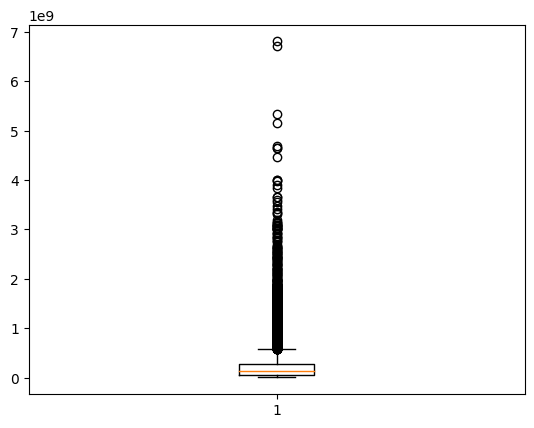

In [141]:
q1 = cost['U1400']['value'].quantile(.25)
q3 = cost['U1400']['value'].quantile(.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

print((len(cost['U1400'][cost['U1400']['value'] > upper_bound]) / len(cost['U1400']))*100)

plt.boxplot(cost['U1400']['value'])
plt.show()

In [142]:
cost['U1400']

,Address,value
0,10001000119,190938000
1,10001000120,844810000
2,10001000126,54218000
3,10001000130,348958000
4,10001000132,426179000
...,...,...
19613,13006383821,101920000
19614,13006383825,26760000
19615,13006383826,130170000
19616,13006383832,201435000


In [143]:
print(u1400['U1400P3S01'].code.value_counts())
print('----------------------------------')
print(u1400['U1400P3S02'].code.value_counts())
print('----------------------------------')
print(u1400['U1400P3S03'].code.value_counts())

#P3S02 --> drug

code
11731    18613
11441    18381
11724    18230
11732    18002
11231    16473
         ...  
11238        6
11239        6
11235        5
11125        4
11319        2
Name: count, Length: 194, dtype: int64
----------------------------------
code
22111    1591
22113    1063
Name: count, dtype: int64
----------------------------------
code
31317    6290
31251    1751
31212    1469
31216    1402
31312    1297
         ... 
31258      10
31213       8
31257       6
31119       2
31214       1
Name: count, Length: 82, dtype: int64


***  محاسبه مجموع هزینه های غیر خوراکی ***

In [144]:
food_cost = {k : pd.DataFrame() for k in file_names}
food_cost['U1400'] = pd.DataFrame(cost_sheet_divided['U1400']['U1400P3S01'].groupby('Address').agg({'value' : 'sum'})).reset_index()
food_cost['U1400'].columns = ['Address', 'value']
food_cost['U1400']

,Address,value
0,10001000119,36664000.0
1,10001000120,24386000.0
2,10001000126,15957000.0
3,10001000130,24188000.0
4,10001000132,23004000.0
...,...,...
19537,13006383821,22270000.0
19538,13006383825,8240000.0
19539,13006383826,9120000.0
19540,13006383832,10105000.0


In [145]:
print(f"intersection = {len(set(list(food_cost['U1400'].Address)) & set(list(cost['U1400'].Address)))}")
print(f"len cost.Address = {len(cost['U1400'].Address)}")
print(f"len food_cost.Address = {len(food_cost['U1400'].Address)}")

intersection = 19542
len cost.Address = 19618
len food_cost.Address = 19542


In [146]:
total_cost = {k : pd.DataFrame() for k in file_names}
total_cost['U1400'] = pd.merge(cost['U1400'], food_cost['U1400'], how = 'outer', on = 'Address', )
total_cost['U1400'].columns = ['Address', 'total_cost', 'edible_cost']
total_cost['U1400'].loc[(total_cost['U1400']['total_cost'].isna()) | (total_cost['U1400']['edible_cost'].isna())]

,Address,total_cost,edible_cost
664,10102012132,20900000,NaN
703,10103012919,15000000,NaN
826,10105015032,9500000,NaN
867,10105015920,35180000,NaN
888,10105016332,24000000,NaN
...,...,...,...
18913,12906363329,4114388,NaN
18914,12906363332,9634388,NaN
18915,12906363335,5200000,NaN
18954,12906364029,5044388,NaN


Filling None value with median

In [147]:
total_cost_median = total_cost['U1400'][~total_cost['U1400'].isna()].median()
total_cost['U1400'].fillna(total_cost_median, inplace = True)

In [148]:
total_cost['U1400']['inedible_cost'] = total_cost['U1400']['total_cost'] - total_cost['U1400']['edible_cost']
total_cost['U1400']

,Address,total_cost,edible_cost,inedible_cost
0,10001000119,190938000,36664000.0,154274000.0
1,10001000120,844810000,24386000.0,820424000.0
2,10001000126,54218000,15957000.0,38261000.0
3,10001000130,348958000,24188000.0,324770000.0
4,10001000132,426179000,23004000.0,403175000.0
...,...,...,...,...
19613,13006383821,101920000,22270000.0,79650000.0
19614,13006383825,26760000,8240000.0,18520000.0
19615,13006383826,130170000,9120000.0,121050000.0
19616,13006383832,201435000,10105000.0,191330000.0


In [149]:
print(f"percentage of family with negative inedible_cost = {len(total_cost['U1400'].loc[total_cost['U1400']['inedible_cost'] < 0]) / len(total_cost['U1400']) * 100}")

percentage of family with negative inedible_cost = 0.24467325925170763


In [150]:
save_excel(total_cost, 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data', 'Total Cost For Each Family U1400', 'xlsx')

OSError: Cannot save file into a non-existent directory: 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data'

***  محاسبه مجموع هزینه های حمل و نقل ***

In [ ]:
transportaion_codes = [71, 72, 72]
transportaion_cost = {k : pd.DataFrame() for k in file_names}

for code in transportaion_codes:
    new_cost = pd.DataFrame(u1400['U1400P3S13'][u1400['U1400P3S13']['code'].astype('str').str.startswith(f'{code}')])
    transportaion_cost['U1400'] = pd.concat([transportaion_cost['U1400'], new_cost])

transportaion_cost['U1400']

,Address,code,value
750,10001001920,71314,500000
913,10005004613,71116,45000000
939,10009008508,71311,2000000
1090,10012010120,71116,850000000
1580,10010008920,71311,11000000
...,...,...,...
246267,13001375923,72119,2500000
246268,13001375923,72122,18000000
246285,13001369614,72117,4500000
246286,13001369614,72119,1000000


In [ ]:
transportaion_cost['U1400'] = pd.DataFrame(transportaion_cost['U1400'].groupby('Address').agg({'value' : 'sum'})).reset_index()
transportaion_cost['U1400'].columns = ['Address', 'value']
transportaion_cost['U1400']

,Address,value
0,10001000111,21400000
1,10001000117,21360000
2,10001000123,20800000
3,10001000211,4800000
4,10001000214,21100000
...,...,...
10720,13006383611,8100000
10721,13006383620,9600000
10722,13006383623,15700000
10723,13006383820,17900000


In [ ]:
save_excel(transportaion_cost, 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data', 'Transportation Cost U1400', 'xlsx')